# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [5]:
# TODO: Make all necessary imports.
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import json
import matplotlib.pyplot as plt

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [6]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# TODO: Create a training set, a validation set and a test set.
train_dataset = dataset['train']
test_dataset = dataset['test']
validation_dataset = dataset['validation'] 

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:02<?, ? url/s]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:02<00:04,  2.11s/ url]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:02<00:04,  2.11s/ url]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Completed...:  67%|██████▋   | 2/3 [00:02<00:02,  2.11s/ url]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<15:13,  2.79s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<15:10,  2.79s/ MiB]

Dl Size...:   1%| 

Dl Size...:  17%|█▋        | 55/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:05<00:19, 13.71 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:05<00:18, 13.71 MiB/s]

Dl Size...:  21%|██        | 69/328 [00:05<00:18, 13.71 MiB/s]

Dl Size...:  21%|██▏       | 70/328 [00:

Dl Size...:  35%|███▌      | 116/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  40%|███▉      | 130/328 [00:07<00:09, 21.89 MiB/s]

Dl Size...:  40%|███▉    

Dl Size...:  54%|█████▎    | 176/328 [00:09<00:06, 25.00 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:09<00:06, 25.00 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  56%|█████▌    | 183/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  58%|█████▊    | 190/328 [00:09<00:05, 25.00 MiB/s]

Dl Size...:  58%|█████▊  

Dl Size...:  72%|███████▏  | 237/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:11<00:03, 26.97 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:11<00:02, 26.97 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:11<00:02, 26.97 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00:11<00:02, 26.97 MiB/s]

Dl Size...:  77%|███████▋  | 251/328 [00:11<00:02, 26.97 MiB/s]

Dl Size...:  77%|███████▋

Dl Size...:  91%|█████████ | 297/328 [00:13<00:01, 27.40 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:13<00:01, 27.40 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:13<00:01, 27.40 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:13<00:01, 27.40 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:13<00:00, 27.40 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:13<00:00, 27.40 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:13<00:00, 27.40 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:13<00:00, 27.40 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:13<00:00, 27.40 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:13<00:00, 27.40 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:13<00:00, 27.40 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:14<00:00, 27.40 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:14<00:00, 27.40 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00:14<00:00, 27.40 MiB/s]

Dl Size...:  95%|█████████▍| 311/328 [00:14<00:00, 27.40 MiB/s]

Extraction completed...: 

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Extraction completed...:   0%|          | 0/8189 [01:20<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.73 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Extraction completed...:   7%|▋         | 590/8189 [01:24<15:30,  8.16 file/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Extraction completed...:  14%|█▍        | 1161/8189 [01:27<03:38, 32.18 file/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Extraction completed...:  19%|█▉        | 1542/8189 [01:29<01:51, 59.48 file/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Extraction completed...:  21%|██▏       | 1741/8189 [01:30<01:24, 76.59 file/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Extraction completed...:  28%|██▊       | 2320/8189 [01:33<00:45, 128.07 file/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Extraction completed...:  36%|███▌      | 2954/8189 [01:36<00:30, 169.63 file/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Extraction completed...:  39%|███▊      | 3159/8189 [01:37<00:27, 183.39 file/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.73 MiB/s]

Extraction completed...:  44%|████▎     | 3582/8189 [01:39<00:25, 177.45 file/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Extraction completed...:  55%|█████▍    | 4468/8189 [01:45<00:21, 172.31 file/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Extraction completed...:  57%|█████▋    | 4638/8189 [01:46<00:22, 160.73 file/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Extraction completed...:  64%|██████▎   | 5214/8189 [01:49<00:16, 175.26 file/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Extraction completed...:  75%|███████▌  | 6181/8189 [01:54<00:10, 190.60 file/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Extraction completed...:  93%|█████████▎| 7603/8189 [02:01<00:02, 199.51 file/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 26.73 MiB/s]

Dl Size...: 100%|████████

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [7]:
# TODO: Get the number of examples in each set from the dataset info.
num_train_examples = info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples
num_validation_examples = info.splits['validation'].num_examples
print(f'Number of Train Examples: {num_train_examples}')
print(f'Number of Test Examples: {num_test_examples}')
print(f'Number of Validation Examples: {num_validation_examples}')

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = info.features['label'].num_classes
print(f'Number of classes: {num_classes}')

Number of Train Examples: 1020
Number of Test Examples: 6149
Number of Validation Examples: 1020
Number of classes: 102


In [8]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in train_dataset.take(3):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")

Image shape: (500, 667, 3), Label: 72
Image shape: (500, 666, 3), Label: 84
Image shape: (670, 500, 3), Label: 70


Image shape: (500, 667, 3), Label: 72


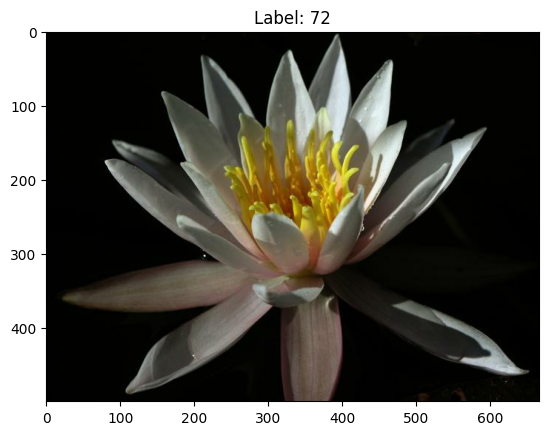

Image shape: (500, 666, 3), Label: 84


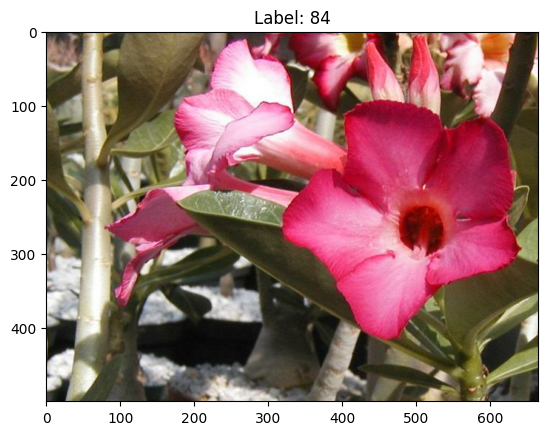

Image shape: (670, 500, 3), Label: 70


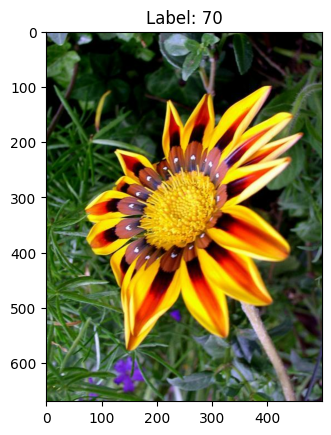

In [9]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
for image, label in train_dataset.take(3):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")
    
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.show()


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [13]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

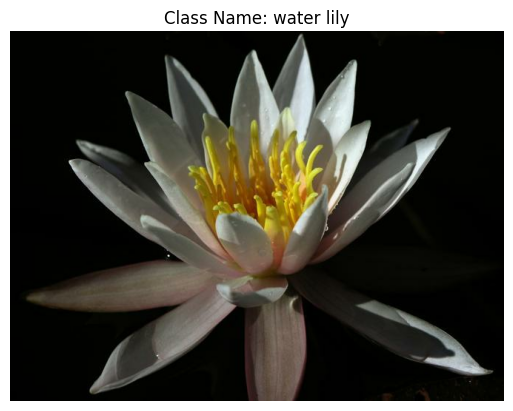

In [14]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in train_dataset.take(1):
    class_name = class_names[str(label.numpy())]
    
    plt.imshow(image.numpy())
    plt.title(f"Class Name: {class_name}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

## Create Pipeline

In [10]:
# TODO: Create a pipeline for each set.
# Define Constants
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Define a function to normalize the images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label

# Data augmentation function (only for training set)
def augment(image, label):
    """Applies random augmentations to the image."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

# Training pipeline
train_pipeline = (train_dataset
                  .map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize the images
                  .map(augment, num_parallel_calls=AUTOTUNE)  # Apply data augmentation
                  .shuffle(buffer_size=1000)  # Shuffle the dataset
                  .batch(BATCH_SIZE)  # Batch the dataset
                  .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

# Validation pipeline
validation_pipeline = (validation_dataset
                       .map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize the images
                       .batch(BATCH_SIZE)  # Batch the dataset
                       .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

# Test pipeline
test_pipeline = (test_dataset
                 .map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize the images
                 .batch(BATCH_SIZE)  # Batch the dataset
                 .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

# Print to confirm pipelines are set
print("Pipelines created for training, validation, and test sets.")

Pipelines created for training, validation, and test sets.


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [11]:
# TODO: Build and train your network.
import tensorflow_hub as hub

# Load the MobileNet feature extractor
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(mobilenet_url, input_shape=(224, 224, 3), trainable=False)

# Define the model
model = keras.Sequential([
    feature_extractor,  # MobileNet as the feature extractor
    keras.layers.Dense(1024, activation='relu'),  # Fully connected layer
    keras.layers.Dropout(0.2),  # Dropout for regularization
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                                 
Total params: 3674278 (14.02 MB)
Trainable params: 1416294 (5.40 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [12]:
# Define a function to resize and normalize the images
def resize_and_normalize(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the images
    return image, label

# Modify the pipelines to include resizing
train_pipeline = (train_dataset
                  .map(resize_and_normalize, num_parallel_calls=AUTOTUNE)  # Resize and normalize the images
                  .map(augment, num_parallel_calls=AUTOTUNE)  # Apply data augmentation
                  .shuffle(buffer_size=1000)  # Shuffle the dataset
                  .batch(BATCH_SIZE)  # Batch the dataset
                  .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

validation_pipeline = (validation_dataset
                       .map(resize_and_normalize, num_parallel_calls=AUTOTUNE)  # Resize and normalize the images
                       .batch(BATCH_SIZE)  # Batch the dataset
                       .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

test_pipeline = (test_dataset
                 .map(resize_and_normalize, num_parallel_calls=AUTOTUNE)  # Resize and normalize the images
                 .batch(BATCH_SIZE)  # Batch the dataset
                 .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing


In [13]:
# Set the number of epochs
EPOCHS = 10

# Train the model and capture the history
history = model.fit(train_pipeline,
                    validation_data=validation_pipeline,
                    epochs=EPOCHS)


Epoch 1/10
32/32 [==============================] - 141s 4s/step - loss: 3.9006 - accuracy: 0.1951 - val_loss: 2.4214 - val_accuracy: 0.5206
Epoch 2/10
32/32 [==============================] - 126s 4s/step - loss: 1.5220 - accuracy: 0.6402 - val_loss: 1.3622 - val_accuracy: 0.6578
Epoch 3/10
32/32 [==============================] - 131s 4s/step - loss: 0.7051 - accuracy: 0.8304 - val_loss: 1.1238 - val_accuracy: 0.7010
Epoch 4/10
32/32 [==============================] - 125s 4s/step - loss: 0.4134 - accuracy: 0.9147 - val_loss: 1.0067 - val_accuracy: 0.7265
Epoch 5/10
32/32 [==============================] - 133s 4s/step - loss: 0.2801 - accuracy: 0.9265 - val_loss: 0.8981 - val_accuracy: 0.7676
Epoch 6/10
32/32 [==============================] - 129s 4s/step - loss: 0.1802 - accuracy: 0.9696 - val_loss: 0.9049 - val_accuracy: 0.7618
Epoch 7/10
32/32 [==============================] - 127s 4s/step - loss: 0.1476 - accuracy: 0.9696 - val_loss: 0.8749 - val_accuracy: 0.7588
Epoch 8/10
32

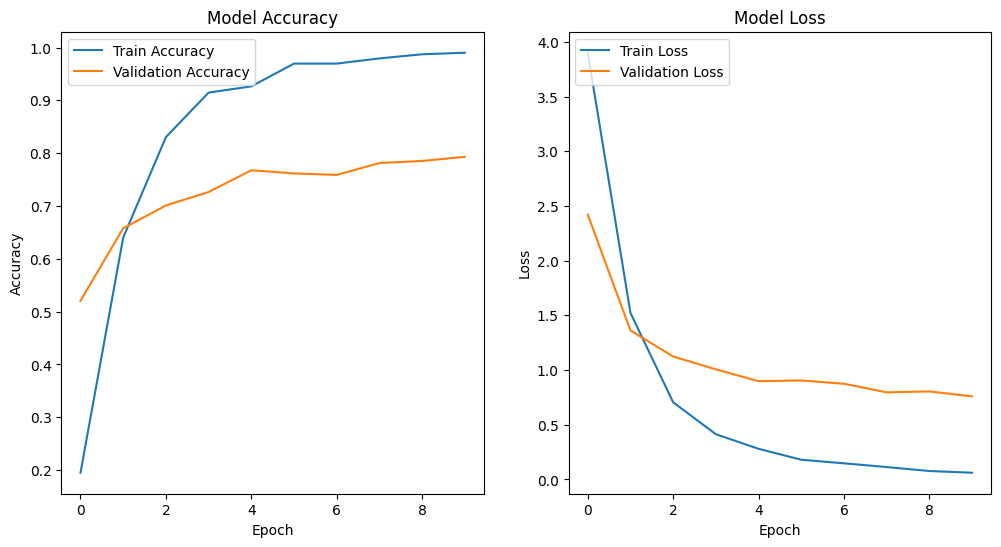

In [14]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
# Plotting the loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [15]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_pipeline)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

193/193 [==============================] - 349s 2s/step - loss: 0.9202 - accuracy: 0.7590
Test Loss: 0.9202301502227783
Test Accuracy: 0.7589852213859558


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [17]:
# TODO: Save your trained model as a Keras model.
# Save the trained model
model.save('flower_classifier.h5')
print("Model saved as 'flower_classifier.h5'.")

Model saved as 'flower_classifier.h5'.


## Load the Keras Model

Load the Keras model you saved above.

In [18]:
# TODO: Load the Keras model
# Load the Keras model
loaded_model = keras.models.load_model('flower_classifier.h5', custom_objects={'KerasLayer': hub.KerasLayer})

# Confirm that the model was loaded successfully
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                                 
Total params: 3674278 (14.02 MB)
Trainable params: 1416294 (5.40 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [19]:
# TODO: Create the process_image function
def process_image(image):
    """Process the image to be suitable for the model."""
    # Convert the image to a TensorFlow tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    
    # Resize the image to the required size (224, 224)
    image = tf.image.resize(image, (224, 224))
    
    # Normalize the image pixels to be between 0 and 1
    image /= 255.0
    
    # Convert the image back to a numpy array
    return image.numpy()

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

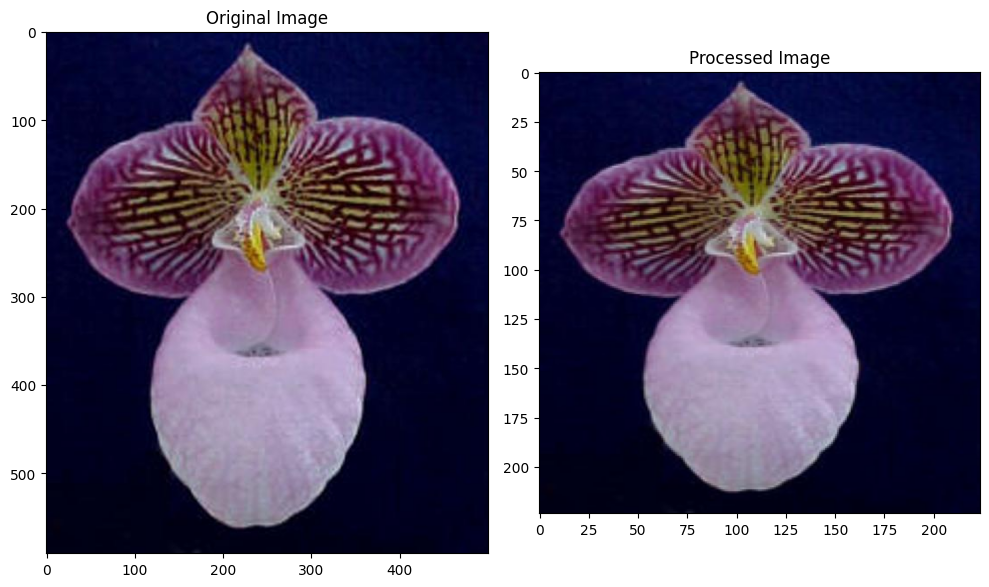

In [20]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [21]:
# TODO: Create the predict function
def predict(image_path, model, top_k=5):
    """Predict the class of an image using a trained model."""
    # Load and process the image
    im = Image.open(image_path)
    image = np.asarray(im)
    processed_image = process_image(image)
    
    # Add a batch dimension to the image
    image_batch = np.expand_dims(processed_image, axis=0)
    
    # Make predictions
    predictions = model.predict(image_batch)
    
    # Get the top K predictions
    top_k_indices = predictions[0].argsort()[-top_k:][::-1]
    top_k_probs = predictions[0][top_k_indices]
    top_k_classes = [str(index) for index in top_k_indices]
    
    return top_k_probs, top_k_classes

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [22]:
# TODO: Plot the input image along with the top 5 classes
probs, classes = predict(image_path, model, top_k=5)
print("Probabilities:", probs)
print("Classes:", classes)

1/1 [==============================] - 0s 414ms/step
Probabilities: [9.99581873e-01 1.17737516e-04 6.13483862e-05 4.22968333e-05
 3.94088565e-05]
Classes: ['1', '5', '19', '67', '12']


In [23]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [24]:
def plot_predictions(image_path, model, class_names, top_k=5):
    """Plot the image with the top K class predictions."""
    probs, classes = predict(image_path, model, top_k)
    
    # Convert class indices to actual class names
    class_labels = [class_names[str(c)] for c in classes]  # Convert indices to strings for dictionary keys
    
    # Plot the image
    im = Image.open(image_path)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(im)
    ax1.axis('off')
    
    # Plot the bar chart
    ax2.barh(class_labels, probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(class_labels)))
    ax2.set_yticklabels(class_labels)
    ax2.set_title('Top 5 Predictions')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 390ms/step


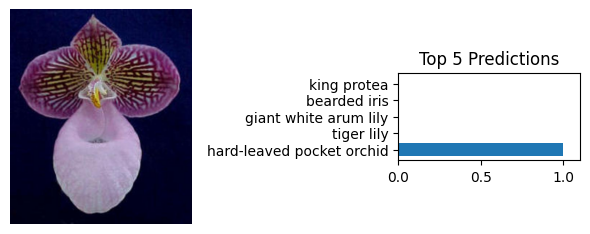

In [25]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
plot_predictions(image_path, loaded_model, class_names)